# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [62]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [63]:
# Put your EDA code here
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [64]:
north_df.shape

(245, 15)

In [65]:
north_df["Rep ID"].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Andy      23
Amanda    23
Name: Rep ID, dtype: int64

In [66]:
north_df['Busy Minutes'].describe()

count    245.000000
mean       9.987755
std        1.403980
min        8.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       12.000000
Name: Busy Minutes, dtype: float64

In [67]:
north_df['Not Ready Minutes'].describe()

count    245.000000
mean       1.914286
std        0.771416
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [68]:
north_df['Incoming Wait Time'].describe()

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [69]:
north_df['During Call Wait Time'].describe()

count    245.000000
mean       2.967347
std        0.843827
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: During Call Wait Time, dtype: float64

In [70]:
north_df.groupby('Time Block').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,3977,3,2,431,89,44.0,130,43
11:00 AM,2545,1,1,256,45,18.0,69,25
12:00 PM,4989,0,1,444,85,63.0,143,45
1:00 PM,1970,0,0,178,32,12.0,46,17
2:00 PM,4774,0,1,346,66,32.0,107,35
3:00 PM,4209,0,0,302,54,35.0,87,30
4:00 PM,4131,0,0,273,57,24.0,84,28
5:00 PM,3048,0,0,165,32,16.0,46,17
9:00 AM,247,1,2,52,9,6.0,15,5


In [71]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [72]:
south_df.shape

(314, 15)

In [73]:
south_df["Rep ID"].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [74]:
south_df['Busy Minutes'].describe()

count    314.00000
mean      10.05414
std        1.40751
min        8.00000
25%        9.00000
50%       10.00000
75%       11.00000
max       12.00000
Name: Busy Minutes, dtype: float64

In [75]:
south_df['Not Ready Minutes'].describe()

count    314.000000
mean       1.910828
std        0.860016
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [76]:
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [77]:
south_df['During Call Wait Time'].describe()

count    314.000000
mean       3.076433
std        0.819424
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: During Call Wait Time, dtype: float64

In [78]:
south_df.groupby('Time Block').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,6688,1,2,563,105,59.0,173,56
11:00 AM,4251,1,0,309,55,36.0,97,31
12:00 PM,12031,3,0,758,140,72.0,221,75
1:00 PM,3393,1,0,221,43,26.0,69,23
2:00 PM,5183,0,0,297,58,50.0,90,30
3:00 PM,7465,0,1,434,78,59.0,132,43
4:00 PM,4612,0,1,255,52,42.0,79,25
5:00 PM,4983,2,0,272,58,27.0,88,26
9:00 AM,535,3,0,48,11,7.0,17,5


### EDA Results

Make note of your results here!

1. How many reps are in each branch? 9 Reps in North Call Center. 11 Reps in South Call Center. 
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? 
   Average Busy minutes: North 9.99 minutes, South 10.05 minutes
   Average Not Ready Minutes: North 1.91 minutes, South 1.91 minutes
   Average incoming wait time: North 3.05 minutes, South 3.00 minutes
   During Call Wait Time: North 2.97 minutes, South 3.08 minutes
3. What is the number of calls taken for each time block?
   North:
    9:00  5 calls
   10:00 43 calls
   11:00 25 calls
   12:00 45 calls
    1:00 17 calls
    2:00 35 calls
    3:00 30 calls
    4:00 28 calls
    5:00 17 calls
    
    South:
     9:00  5 calls
    10:00 56 calls
    11:00 31 calls
    12:00 75 calls
     1:00 23 calls
     2:00 30 calls
     3:00 43 calls
     4:00 25 calls
     5:00 26 calls

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [79]:
# Clean your data here
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [80]:
north_df.groupby('Incoming or Outgoing').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,
Incoming,3321,1,3,810,159,250.0,247,82
Outgoing,26569,4,4,1637,310,0.0,480,163


In [81]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [82]:
def whitespace_remover(df):
    for i in north_df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].map(str.strip)
        else:
            pass

In [83]:
whitespace_remover(north_df)

In [84]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [85]:
north_df[north_df.duplicated(keep=False)]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [86]:
north_df.shape

(245, 15)

In [87]:
north_df.drop_duplicates(inplace=True)

In [88]:
north_df.shape

(245, 15)

In [89]:
north_df.drop(columns=['Unnamed: 0'], inplace=True)

In [90]:
north_df['Lost Call'].value_counts()

0    240
1      5
Name: Lost Call, dtype: int64

In [91]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [92]:
south_df.groupby('Incoming or Outgoing').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,
Incoming,7875,1,1,1259,246,378.0,393,126
Outgoing,41266,10,3,1898,354,0.0,573,188


In [93]:
south_df['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [94]:
south_df[south_df.duplicated(keep=False)]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [95]:
south_df.shape

(314, 15)

In [96]:
south_df.drop_duplicates(inplace=True)

In [97]:
south_df.shape

(314, 15)

In [98]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [99]:
south_df.drop(columns=['Unnamed: 0'], inplace=True)

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? Yes. Incoming Wait Time for Outgoing calls when summed is 0.0. 
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? I noticed a whitespace inconsistency in one of the 'YES' values. I created a function to remove whitespace from the data frame to keep it and rectify the inconsistent value.
3. Are there duplicates in the two data sets? If there are, how did you handle them? No duplicates found.
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it? I did not see any use for the Unnamed: 0 column. I dropped the column.

In [100]:
north_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [101]:
south_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company? 
4. For each branch and the entire company, what is the average speed of answer?

In [102]:
# Manipulate data here
df = north_df.append(south_df)

In [103]:
df.shape

(559, 14)

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. North Call Center: Brent, 37 calls; South Call Center: Eric, 35 calls
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? North= 2.85%, South=1.27%, Both=1.97%. All 3 fall within target range to meet KPI. 
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company? Incoming Wait Time at or below 2 seconds for both branches and overall is 15% meets SLA.
4. For each branch and the entire company, what is the average speed of answer?  Incoming Wait time (speed of answer) for North Branch is 3.05 seconds, South Branch is 3.00 seconds, and the overall company average is 3.02 seconds. 

In [110]:
df.groupby(['Rep ID', 'Branch']).sum().sort_values(by='Calls', ascending=False)

,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,
Brent,North,0,1,362,71,17.0,117,37
Eric,South,0,0,361,54,47.0,112,35
Randy,South,3,1,320,66,47.0,98,33
Sandy,South,1,0,325,60,34.0,100,32
Helga,South,0,2,292,58,36.0,95,31
Lilly,North,0,2,307,59,37.0,88,30
Todd,North,1,0,296,58,21.0,97,29
Duke,North,2,0,292,56,39.0,85,29
George,South,0,0,298,53,41.0,87,29


In [111]:
df.groupby(['Branch']).describe()

Lost Call                                              Abandoned  \
           count      mean       std  min  25%  50%  75%  max     count   
Branch                                                                    
North      245.0  0.020408  0.141681  0.0  0.0  0.0  0.0  1.0     245.0   
South      314.0  0.035032  0.184154  0.0  0.0  0.0  0.0  1.0     314.0   

                  ... During Call Wait Time       Calls                      \
            mean  ...                   75%  max  count mean  std  min  25%   
Branch            ...                                                         
North   0.028571  ...                   4.0  4.0  245.0  1.0  0.0  1.0  1.0   
South   0.012739  ...                   4.0  4.0  314.0  1.0  0.0  1.0  1.0   

                       
        50%  75%  max  
Branch                 
North   1.0  1.0  1.0  
South   1.0  1.0  1.0  

[2 rows x 56 columns]

In [112]:
for col in df.columns:
    pct_sla = np.mean(df['Incoming Wait Time'] <= 2.0)
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 15%
Call Purpose - 15%
Time Block - 15%
Incoming or Outgoing - 15%
Queue - 15%
Rep ID - 15%
Sale - 15%
Lost Call - 15%
Abandoned - 15%
Busy Minutes - 15%
Not Ready Minutes - 15%
Incoming Wait Time - 15%
During Call Wait Time - 15%
Calls - 15%


In [113]:
for col in north_df.columns:
    pct_sla = np.mean(north_df['Incoming Wait Time'] <= 2.0)
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 15%
Call Purpose - 15%
Time Block - 15%
Incoming or Outgoing - 15%
Queue - 15%
Rep ID - 15%
Sale - 15%
Lost Call - 15%
Abandoned - 15%
Busy Minutes - 15%
Not Ready Minutes - 15%
Incoming Wait Time - 15%
During Call Wait Time - 15%
Calls - 15%


In [114]:
for col in south_df.columns:
    pct_sla = np.mean(south_df['Incoming Wait Time'] <= 2.0)
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 15%
Call Purpose - 15%
Time Block - 15%
Incoming or Outgoing - 15%
Queue - 15%
Rep ID - 15%
Sale - 15%
Lost Call - 15%
Abandoned - 15%
Busy Minutes - 15%
Not Ready Minutes - 15%
Incoming Wait Time - 15%
During Call Wait Time - 15%
Calls - 15%


In [115]:
df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [116]:
df.groupby(['Branch', 'Incoming Wait Time'], dropna=False).sum()

Lost Call  Abandoned  Busy Minutes  \
Branch Incoming Wait Time                                       
North  1.0                         0          1           173   
       2.0                         0          1           158   
       3.0                         0          0           111   
       4.0                         1          1           203   
       5.0                         0          0           165   
       NaN                         4          4          1637   
South  1.0                         0          0           197   
       2.0                         1          0           285   
       3.0                         0          0           291   
       4.0                         0          1           303   
       5.0                         0          0           183   
       NaN                        10          3          1898   

                           Not Ready Minutes  During Call Wait Time  Calls  
Branch Incoming Wait Time                                                   
North  1.0                                36                     57     17  
       2.0                                27                     48     16  
       3.0                                24                     37     12  
       4.0                                38                     57     20  
       5.0                                34                     48     17  
       NaN                               310                    480    163  
South  1.0                                43                     64     20  
       2.0                                50                     88     28  
       3.0                                60                     90     29  
       4.0                                58                     96     30  
       5.0                                35                     55     19  
       NaN                               354                    573    188

In [117]:
df.groupby(['Branch']).mean()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,
North,0.020408,0.028571,9.987755,1.914286,3.04878,2.967347,1.0
South,0.035032,0.012739,10.054140,1.910828,3.00000,3.076433,1.0


In [118]:
df['Incoming Wait Time'].mean()

3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [119]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [120]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [121]:
df1 = pd.DataFrame({'Queues': ['A', 'B', 'C', 'D'], 'Avg Abandon Rate': [0.041666666666666664, 0.020134228187919462, 0.007246376811594203,0.017045454545454544]})
df1

,Queues,Avg Abandon Rate
0,A,0.041667
1,B,0.020134
2,C,0.007246
3,D,0.017045


Text(0, 0.5, 'Avg Abandon Rate')

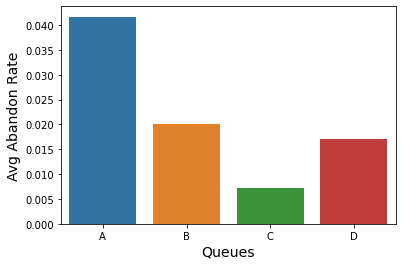

In [122]:
fig1 = sns.barplot(x="Queues", y="Avg Abandon Rate", data=df1)
fig1.set_xlabel("Queues", fontsize = 14)
fig1.set_ylabel("Avg Abandon Rate", fontsize = 14)

Text(0, 0.5, 'Avg Abandon Rate')

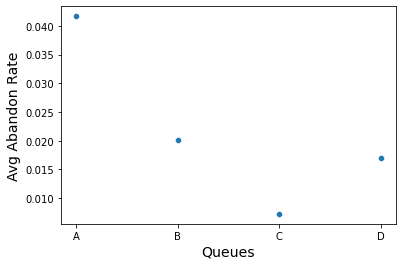

In [123]:
fig1a = sns.scatterplot(x="Queues", y="Avg Abandon Rate", data=df1)
fig1a.set_xlabel("Queues", fontsize = 14)
fig1a.set_ylabel("Avg Abandon Rate", fontsize = 14)

In [124]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [125]:
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

Text(0, 0.5, 'Average Speed of Answer')

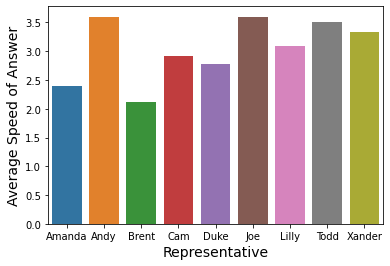

In [126]:
df2n = north_plt
fig2n = sns.barplot(x='Rep ID', y='Incoming Wait Time', data=df2n)
fig2n.set_xlabel("Representative", fontsize = 14)
fig2n.set_ylabel("Average Speed of Answer", fontsize = 14)

In [127]:
df2s = south_plt
fig2s = sns.barplot(x='Rep ID', y='Incoming Wait Time', data=df2b)
fig2s.set_xlabel("Representative", fontsize = 14)
fig2s.set_ylabel("Average Speed of Answer", fontsize = 14)

NameError: name 'df2b' is not defined

In [128]:
quick_callss = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_repss= quick_callss[["Rep ID", "Calls"]]
quick_statss = quick_repss.groupby(["Rep ID"]).sum() 

In [129]:
table1= quick_stats
table1

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [130]:
table1s = quick_statss
table1s

,Calls
Rep ID,
Alice,3
Eric,10
George,4
Helga,3
Josh,2
Karl,3
Kate,3
Randy,7
Sandy,7


In [131]:
table2= total_stats
table2

,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


In [132]:
total_calls_ins = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_callss = total_calls_ins[["Rep ID", "Calls"]]     
total_statss = rep_callss.groupby(["Rep ID"]).sum() # Final Table  

In [133]:
table2s = total_statss
table2s

,Calls
Rep ID,
Alice,6
Eric,18
George,13
Helga,11
Josh,9
Karl,9
Kate,11
Randy,16
Sandy,13


In [134]:
table3 = service_level
table3

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [135]:
table3["Service Level %"]= service_level["Service Level %"]
table3

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [136]:
service_levels = pd.merge(quick_statss, total_statss, on="Rep ID")

In [137]:
service_levels["Service Level %"] = service_levels["Calls_x"]/service_levels["Calls_y"] * 100

In [138]:
table3s= service_levels

In [139]:
table3s["Service Level %"] = service_levels["Service Level %"]
table3s

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Alice,3,6,50.000000
Eric,10,18,55.555556
George,4,13,30.769231
Helga,3,11,27.272727
Josh,2,9,22.222222
Karl,3,9,33.333333
Kate,3,11,27.272727
Randy,7,16,43.750000
Sandy,7,13,53.846154


In [140]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

In [141]:
sales_support

{'Outgoing': 123, 'Incoming': 75}

In [142]:
count_by_type = pd.DataFrame({'Call Purpose': ['Complaints', 'Sales Support', 'Product Support'],'Incoming': [51, 75, 82],
                   'Outgoing': [0, 123, 228]})
count_by_type

,Call Purpose,Incoming,Outgoing
0,Complaints,51,0
1,Sales Support,75,123
2,Product Support,82,228


<AxesSubplot:xlabel='Call Purpose'>

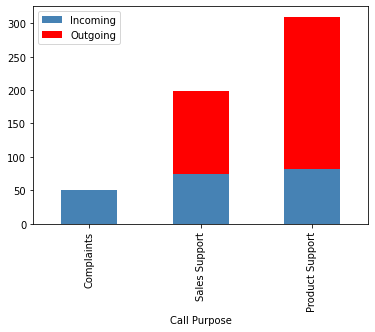

In [143]:
count_by_type.set_index('Call Purpose').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? The South branch is operating more efficiently. Queues C and D have lower average abandonment rates overall, and the average speed of answer is higher for agents in the South branch than the North. Depending on what the stretch target for SLA is (I'm targeting 33.3 % based on results), the South branch is almost twice as effective as the North branch (6 agents in South vs. 4 agents in North above 33.3%)
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help? The North branch has fewer reps and longer wait times, resulting in lower SLA completion. I would recommend more reps in the North branch.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis? It might be interesting to see one call resolution included in the dataset. Over the course of the 15 years and 3 contact centers, I have worked in, this has always been a telling KPI. Callers that return increase volume (decrease efficiency in incoming wait time and answer rate) and tend to have more complaints.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [160]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:
data = call_times.groupby(['Call Purpose', 'Time Block']).sum()
data
# Use groupby and get_group to select which call purpose to plot:
get_group = df.groupby('Call Purpose').sum()
get_group

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Call Purpose,,,,,,,
Complaint,1,3,513,113,149.0,161,51
Product Support,7,3,3110,586,242.0,921,310
Sales Support,8,5,1981,370,237.0,611,198


In [156]:
data

Calls
Call Purpose    Time Block       
Complaint       10:00 AM        6
                11:00 AM        3
                12:00 PM       11
                1:00 PM         6
                2:00 PM         5
                3:00 PM         6
                4:00 PM         3
                5:00 PM         6
                9:00 AM         5
Product Support 10:00 AM       20
                11:00 AM       26
                12:00 PM       60
                1:00 PM        16
                2:00 PM        50
                3:00 PM        61
                4:00 PM        40
                5:00 PM        32
                9:00 AM         5
Sales Support   10:00 AM       73
                11:00 AM       27
                12:00 PM       49
                1:00 PM        18
                2:00 PM        10
                3:00 PM         6
                4:00 PM        10
                5:00 PM         5

In [162]:
sns.barplot(x='Call Purpose', y='Time Block', data=data)

ValueError: Could not interpret input 'Call Purpose'